In [ ]:
import tensorflow as tf
print(tf.__version__)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

2.12.0


In [ ]:
df=pd.read_csv('/content/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [ ]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df.shape

(7043, 21)

In [ ]:
x=df.iloc[:,1:-1]
y=df.iloc[:,-1]

In [ ]:
all_obj_columns=x.dtypes[x.dtypes=='O'].index

In [ ]:
x[all_obj_columns].nunique()

gender                 2
Partner                2
Dependents             2
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
TotalCharges        6531
dtype: int64

In [ ]:
x.TotalCharges=np.where(x.TotalCharges==' ',np.nan,x.TotalCharges)

In [ ]:
x['TotalCharges']=x.TotalCharges.astype('float32')

In [ ]:
x['TotalCharges'].fillna(np.mean(x.TotalCharges),inplace=True)

In [ ]:
x[all_obj_columns].head()

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges
0,Female,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.850000
1,Male,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,1889.500000
2,Male,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,108.150002
3,Male,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),1840.750000
4,Female,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,151.649994


In [ ]:
for col in all_obj_columns:
  uniques=x[col].unique()
  x[col]=x[col].map({ key:val for key,val in zip(uniques,range(1,len(uniques)+1))  })

In [ ]:
x.head(1)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,29.85,1


In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=100)

In [ ]:
x_train.head(1)
y_train=y_train.map( {'Yes':0,'No':1} )
y_test=y_test.map( {'Yes':0,'No':1} )

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
5066,2,0,1,1,44,1,1,1,1,1,2,1,2,2,3,2,3,54.3,4772


In [ ]:
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)

In [ ]:
x_test=scaler.transform(x_test)

In [ ]:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU,ReLU,PReLU,ELU
from tensorflow.keras.layers import Dropout


In [ ]:
x_train.shape[1]

19

In [ ]:
classifier=Sequential()
classifier.add(tf.keras.Input(shape=(x_train.shape[1],)))
classifier.add(Dense(units= 36,activation='relu'    ))
classifier.add(Dropout(0.2))
classifier.add(Dense( units= 18,activation='relu'     ))
classifier.add(Dropout(0.2))
classifier.add(Dense( units= 8,activation='relu'     ))
classifier.add( Dense(  units= 1,activation='sigmoid'   ))

In [ ]:
classifier.build()

In [ ]:
classifier.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 36)                720       
                                                                 
 dropout_4 (Dropout)         (None, 36)                0         
                                                                 
 dense_9 (Dense)             (None, 18)                666       
                                                                 
 dropout_5 (Dropout)         (None, 18)                0         
                                                                 
 dense_10 (Dense)            (None, 8)                 152       
                                                                 
 dense_11 (Dense)            (None, 1)                 9         
                                                                 
Total params: 1,547
Trainable params: 1,547
Non-traina

In [ ]:
optimizer=tf.keras.optimizers.Adam(learning_rate=0.01)
loss=tf.keras.losses.BinaryCrossentropy()
classifier.compile(optimizer=optimizer,loss=loss,metrics=['accuracy'])

In [ ]:
early_stopping=tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    min_delta=0.0005,
    patience=10)

In [ ]:
from keras import callbacks
model_history=classifier.fit(
    x=x_train,y=y_train,
    validation_split=0.2,
    batch_size=100,
    epochs=100,
    callbacks=early_stopping
)

Epoch 1/100
46/46 [==============================] - 0s 7ms/step - loss: 0.4144 - accuracy: 0.8136 - val_loss: 0.4090 - val_accuracy: 0.8083
Epoch 2/100
46/46 [==============================] - 0s 5ms/step - loss: 0.4159 - accuracy: 0.8132 - val_loss: 0.4008 - val_accuracy: 0.8128
Epoch 3/100
46/46 [==============================] - 0s 5ms/step - loss: 0.4135 - accuracy: 0.8116 - val_loss: 0.3983 - val_accuracy: 0.8128
Epoch 4/100
46/46 [==============================] - 0s 5ms/step - loss: 0.4168 - accuracy: 0.8156 - val_loss: 0.4099 - val_accuracy: 0.8012
Epoch 5/100
46/46 [==============================] - 0s 5ms/step - loss: 0.4157 - accuracy: 0.8083 - val_loss: 0.4013 - val_accuracy: 0.8075
Epoch 6/100
46/46 [==============================] - 0s 6ms/step - loss: 0.4114 - accuracy: 0.8141 - val_loss: 0.4012 - val_accuracy: 0.8092
Epoch 7/100
46/46 [==============================] - 0s 5ms/step - loss: 0.4168 - accuracy: 0.8063 - val_loss: 0.4035 - val_accuracy: 0.8048
Epoch 8/100
4

In [ ]:
### no of iteration per one epochs
int(x_train.shape[0]*0.8)/100

45.07

In [ ]:
model_history.history

{'loss': [0.4143568277359009,
  0.41585102677345276,
  0.41351354122161865,
  0.4167943000793457,
  0.41568723320961,
  0.41142770648002625,
  0.41679707169532776,
  0.4124204218387604,
  0.4085334539413452,
  0.40541744232177734,
  0.4068591296672821,
  0.4067654311656952,
  0.40399765968322754],
 'accuracy': [0.8136232495307922,
  0.8131794929504395,
  0.8116263747215271,
  0.8156201243400574,
  0.8082982301712036,
  0.814067006111145,
  0.8063012957572937,
  0.8131794929504395,
  0.8193920850753784,
  0.8185045719146729,
  0.814067006111145,
  0.8176170587539673,
  0.8202795386314392],
 'val_loss': [0.4089720547199249,
  0.40079256892204285,
  0.3982838988304138,
  0.4099147915840149,
  0.4013102352619171,
  0.40120309591293335,
  0.403473824262619,
  0.40142813324928284,
  0.4103853404521942,
  0.4020218551158905,
  0.4055309295654297,
  0.40625691413879395,
  0.40640732645988464],
 'val_accuracy': [0.8083407282829285,
  0.8127772808074951,
  0.8127772808074951,
  0.801242232322692

In [ ]:
all_weights=classifier.get_weights()[0]

In [ ]:
len(all_weights)

19

In [ ]:
classifier.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 36)                720       
                                                                 
 dropout_4 (Dropout)         (None, 36)                0         
                                                                 
 dense_9 (Dense)             (None, 18)                666       
                                                                 
 dropout_5 (Dropout)         (None, 18)                0         
                                                                 
 dense_10 (Dense)            (None, 8)                 152       
                                                                 
 dense_11 (Dense)            (None, 1)                 9         
                                                                 
Total params: 1,547
Trainable params: 1,547
Non-traina

In [ ]:
len(classifier.get_weights()[1])

36

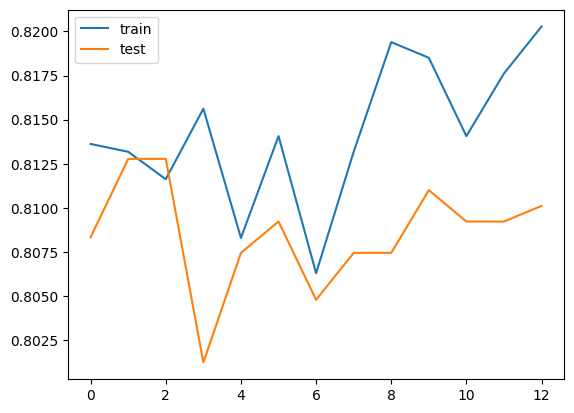

In [ ]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.legend(['train','test'])

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,np.where(classifier.predict(x_test)<=0.5,0,1))

45/45 [==============================] - 0s 1ms/step


0.7877927608232789

In [ ]:
dic={'sathish':100,"kumar":34}
{ i:j for i,j in dic.items() if j>=35}


{'sathish': 100}

In [ ]:
tf.keras.models.save_model(classifier,'model.h5')

In [ ]:
model=tf.keras.models.load_model('/content/model.h5')

In [ ]:
model.predict(x_test)

45/45 [==============================] - 0s 2ms/step


array([[0.98645675],
       [0.99591595],
       [0.9593503 ],
       ...,
       [0.5993004 ],
       [0.8100574 ],
       [0.9356869 ]], dtype=float32)

In [ ]:
x=df.drop(columns=['TotalCharges','customerID'])
y=df[['TotalCharges']]

In [ ]:
y.TotalCharges=np.where(y.TotalCharges==' ',np.nan,y.TotalCharges)

In [ ]:
y['TotalCharges']=y.TotalCharges.astype('float32')

In [ ]:
y['TotalCharges'].fillna(np.mean(y.TotalCharges),inplace=True)

In [ ]:
for col in all_obj_columns:
  try:
      uniques=x[col].unique()
      x[col]=x[col].map({ key:val for key,val in zip(uniques,range(1,len(uniques)+1))  })
  except:pass

In [ ]:
x.Churn=x.Churn.map( {'Yes':0,'No':1} )

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=100)

In [ ]:
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [ ]:
regressor=Sequential()
regressor.add(tf.keras.Input(shape=(x_train.shape[1],)))
regressor.add( Dense(units=36 , activation='relu')  )
regressor.add( Dense(units=18 , activation='relu')  )
regressor.add( Dense(units=8 , activation='relu')  )
regressor.add( Dense(units=1)  )

In [ ]:
regressor.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 36)                720       
                                                                 
 dense_17 (Dense)            (None, 18)                666       
                                                                 
 dense_18 (Dense)            (None, 8)                 152       
                                                                 
 dense_19 (Dense)            (None, 1)                 9         
                                                                 
Total params: 1,547
Trainable params: 1,547
Non-trainable params: 0
_________________________________________________________________


In [ ]:
regressor.compile(
    optimizer='adam',
    loss='mean_squared_error',
    metrics=['mean_squared_error']
)

In [ ]:
from keras import callbacks
model_history=regressor.fit(
    x=x_train,y=y_train,
    validation_split=0.2,
    batch_size=100,
    epochs=100,
    callbacks=early_stopping
)

Epoch 1/100
46/46 [==============================] - 2s 7ms/step - loss: 10209183.0000 - mean_squared_error: 10209183.0000 - val_loss: 10665742.0000 - val_mean_squared_error: 10665742.0000
Epoch 2/100
46/46 [==============================] - 0s 5ms/step - loss: 10179120.0000 - mean_squared_error: 10179120.0000 - val_loss: 10604159.0000 - val_mean_squared_error: 10604159.0000
Epoch 3/100
46/46 [==============================] - 0s 6ms/step - loss: 10059503.0000 - mean_squared_error: 10059503.0000 - val_loss: 10375870.0000 - val_mean_squared_error: 10375870.0000
Epoch 4/100
46/46 [==============================] - 0s 4ms/step - loss: 9679979.0000 - mean_squared_error: 9679979.0000 - val_loss: 9719432.0000 - val_mean_squared_error: 9719432.0000
Epoch 5/100
46/46 [==============================] - 0s 4ms/step - loss: 8744897.0000 - mean_squared_error: 8744897.0000 - val_loss: 8304299.5000 - val_mean_squared_error: 8304299.5000
Epoch 6/100
46/46 [==============================] - 0s 4ms/ste

In [ ]:
predict=regressor.predict(x_test)

45/45 [==============================] - 0s 2ms/step


In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test,predict)

0.9979152729263666

In [ ]:
regressor.save('reg_model.h5')
reg_model=tf.keras.models.load_model('reg_model.h5')

In [ ]:
reg_model.predict(x_test)

45/45 [==============================] - 0s 3ms/step


array([[1005.20886],
       [1555.6033 ],
       [4305.669  ],
       ...,
       [3959.8962 ],
       [3796.2502 ],
       [3874.0305 ]], dtype=float32)

In [ ]:
# !pip install -q -U keras-tuner

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 172.2/172.2 KB 6.7 MB/s eta 0:00:00


In [ ]:
import keras_tuner as kt

In [ ]:
from tensorflow import keras


In [ ]:
(train_x,train_y),(test_x,test_y)=keras.datasets.fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
train_x.shape,test_x.shape

((60000, 28, 28), (10000, 28, 28))

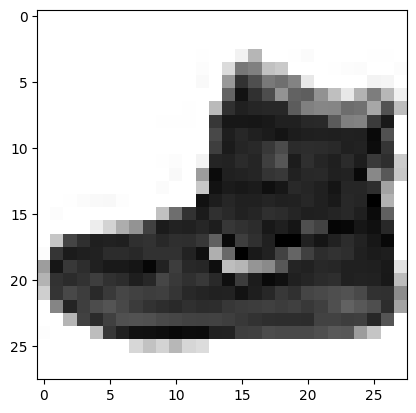

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(train_x[0],cmap='binary')

In [ ]:
### convert pixal range 0 to 1

x_train_norm=train_x.astype('float32')/255.0
x_test_norm=test_x.astype('float32')/255.0

In [ ]:
x_train_norm.max(),x_train_norm.min()

(1.0, 0.0)

In [ ]:
def model_builder(hp):
  model=Sequential()
  model.add(   keras.layers.Flatten(input_shape=(28,28)) )

  hp_units=hp.Int(  'units',min_value=32,max_value=512,step=32  )
  model.add(Dense(units=hp_units  , activation='relu'))

  hp_units_1=hp.Int(  'units_1' ,min_value=32,max_value=256,step=32  )
  model.add(Dense(units=hp_units_1  , activation='relu'))

  model.add(Dense(10,activation='softmax'))

  hp_learning_rate=hp.Choice('learning_rate',values=[0.0001,0.002,0.001,0.05])

  model.compile(
      optimizer=keras.optimizers.Adam(learning_rate=hp_learning_rate),
      loss=keras.losses.SparseCategoricalCrossentropy(),
      metrics=['accuracy']
  )

  return model

In [ ]:
tuner=kt.Hyperband(
    model_builder,
    objective='val_accuracy',
    max_epochs=10,
    factor=3,
    directory='my_dir',
    project_name='intro_to_kt'
)

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
early_stopping=EarlyStopping(
    monitor='val_loss',
    min_delta=0.0005,
    patience=10)

In [ ]:
tuner.search(x_train_norm,train_y,epochs=50,validation_split=0.2,callbacks=[early_stopping])

Trial 25 Complete [00h 02m 23s]
val_accuracy: 0.8896666765213013

Best val_accuracy So Far: 0.8898333311080933
Total elapsed time: 00h 21m 26s


In [ ]:
best_hps=tuner.get_best_hyperparameters(num_trials=1)[0]

In [ ]:
best_hps.get('units_1')

32

In [ ]:
hypermodel = tuner.hypermodel.build(best_hps)

# Retrain the model
hypermodel.fit(x_train_norm,train_y, epochs=10, validation_split=0.2,
               callbacks=[early_stopping])

Epoch 1/10


1500/1500 [==============================] - 11s 6ms/step - loss: 0.5244 - accuracy: 0.8148 - val_loss: 0.4598 - val_accuracy: 0.8363
Epoch 2/10
1500/1500 [==============================] - 10s 6ms/step - loss: 0.3814 - accuracy: 0.8622 - val_loss: 0.3661 - val_accuracy: 0.8692
Epoch 3/10
1500/1500 [==============================] - 10s 6ms/step - loss: 0.3441 - accuracy: 0.8744 - val_loss: 0.3577 - val_accuracy: 0.8724
Epoch 4/10
1500/1500 [==============================] - 9s 6ms/step - loss: 0.3141 - accuracy: 0.8838 - val_loss: 0.3476 - val_accuracy: 0.8780
Epoch 5/10
1500/1500 [==============================] - 9s 6ms/step - loss: 0.2976 - accuracy: 0.8908 - val_loss: 0.3452 - val_accuracy: 0.8772
Epoch 6/10
1500/1500 [==============================] - 9s 6ms/step - loss: 0.2799 - accuracy: 0.8952 - val_loss: 0.3358 - val_accuracy: 0.8811
Epoch 7/10
1500/1500 [==============================] - 10s 6ms/step - loss: 0.2705 - accuracy: 0.8999 - val_loss: 0.3298 - val_accuracy: 0.8815